In [1]:
import matplotlib.pyplot as plt
import numpy as np
#import analyzer
#import Compare
import Read
import Maxima
import re
import os
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import importlib
#importlib.reload(Compare)
#importlib.reload(analyzer)
importlib.reload(Read)
importlib.reload(Maxima)
plt.rcParams['text.usetex'] = False
plt.rcParams.update({'font.size': 16})

In [6]:
plt.rcParams.update({'font.size': 16})

folder="../4x4x4x32/b2p44_new/gf_afm_2p0t/"
sizes=[4,4,4,32]
max_modes=8
colors=3
spin_length=4

conf_start=10
conf_end=500
conf_step=10
conf=np.arange(conf_start,conf_end,conf_step)

lambda_min=0.01
lambda_max=0.20
steps=20
lambdas=np.linspace(lambda_min,lambda_max,num=steps)
max_modes=8
RPO_threshold=0.15

#Compare.Index_dic(folder,lambdas, conf)
#Compare.GM_RPO_cut(folder,sizes,max_modes,colors,spin_length,conf,lambdas,RPO_threshold)

#Compare.GM_RPO_modes(folder,sizes,max_modes,colors,spin_length,conf_start,conf_end,conf_step,RPO_threshold)


In [16]:
folder="/home/ivan/ssd/4x4x4x32/b2p44_new/gf/"
density=Read.topology(folder+"profile4dt4c1000to.dat")
t=np.arange[(0,32)]
plt.plot(density)

TypeError: 'builtin_function_or_method' object is not subscriptable

### Doublers

In [29]:
measure="SusyMode_bin"
sizes=[4,4,4,32]
t=np.arange(0,sizes[3])
colors=3
spin=4

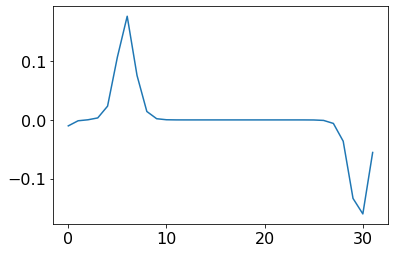

In [67]:
conf=550
folder_0="../filtering/4x4x4x32/b2p44_new/gf/"
density_top,sizes=Read.topology_1d(folder_0+"profile4dt4c"+str(conf)+"to.dat")
plt.plot(density_top)

0 1 0.9983305705993998


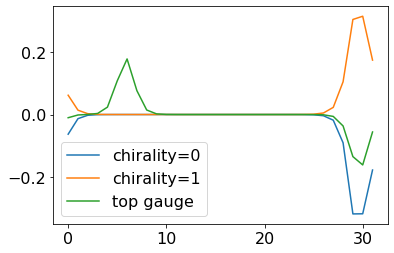

In [77]:
conf=550
folder_0="../filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/doublers/sector_0/"
folder_dou="../filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/doublers/sector_1/"
GM=np.zeros((8,8))
for i in range(0,1,1):
    for j in range(0,8,1):
        mode=folder_0+"SusyMode_bin_"+str(i)+"-"+str(conf)
        density,sizes=Read.bin_mode(mode,sizes,colors,spin)
        density_s0=density.sum(axis=(0,1,2))

        mode=folder_dou+"SusyMode_bin_"+str(j)+"-"+str(conf)
        density,sizes=Read.bin_mode(mode,sizes,colors,spin)
        density_s1=density.sum(axis=(0,1,2))
        
        GM[i,j]=Compare.Geom_mean_1d(density_s1,density_s0)
        if GM[i,j]>0.99:
            print(i,j,GM[i,j])
        #density=-density_s0
        #density=density_s1
        #density=density_s1-density_s0
            plt.plot(t,-density_s0,label="chirality=0")
            plt.plot(t,density_s1,label="chirality=1")
            plt.plot(density_top, label="top gauge")
            plt.legend(loc="lower left")
            plt.show()

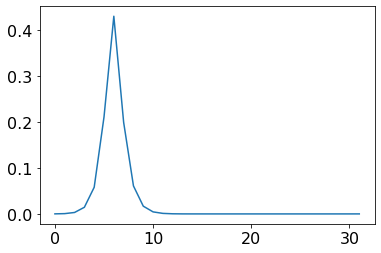

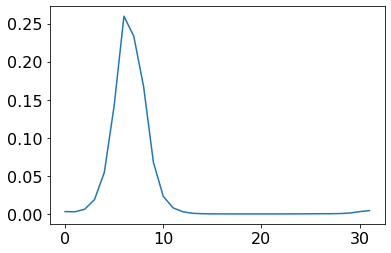

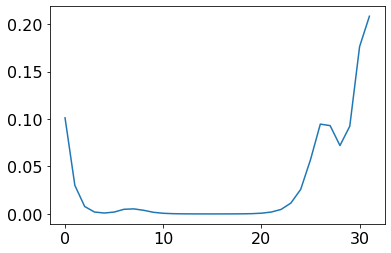

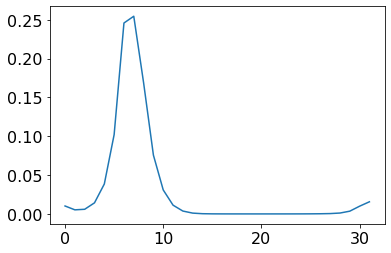

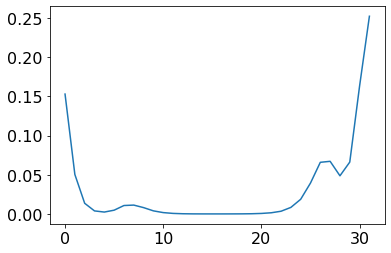

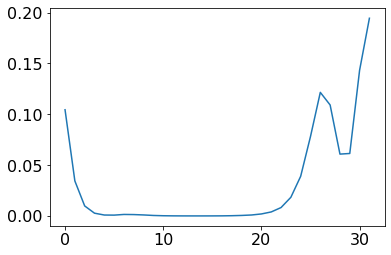

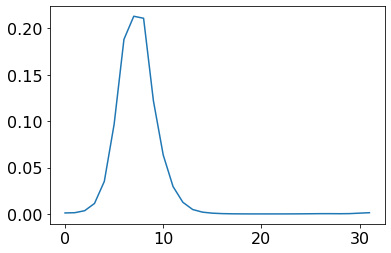

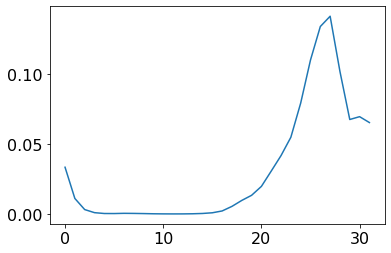

In [34]:
conf=550
folder="../filtering/4x4x4x32/b2p44_new/gf_afm_0p5t/"
for i in range(0,8,1):
    measure="sector_0/"
    mode=folder+measure+"SusyMode_bin_"+str(i)+"-"+str(conf)
    density,sizes=Read.bin_mode(mode,sizes,colors,spin)
    density_s0=density.sum(axis=(0,1,2))
    
    measure="sector_1/"
    mode=folder+measure+"SusyMode_bin_"+str(i)+"-"+str(conf)
    density,sizes=Read.bin_mode(mode,sizes,colors,spin)
    density_s1=density.sum(axis=(0,1,2))
    
    density=-density_s0
    density=density_s1
    #density=density_s1-density_s0
    plt.plot(t,density)
    plt.show()

### 8x64

In [1]:
folder="../8x8x8x64_su2/b2p60/gf_afm_3p0t/"
sizes=[8,8,8,64]
t=np.arange(0,sizes[3])
colors=3
spin=4

In [ ]:
conf=300
for i in range(0,4,1):
    measure="sector_0/"
    mode=folder+measure+"SusyMode_bin_"+str(i)+"-"+str(conf)
    density,sizes=Read.bin_mode(mode,sizes,colors,spin)
    density_s0=density.sum(axis=(0,1,2))
    
    measure="sector_1/"
    mode=folder+measure+"SusyMode_bin_"+str(i)+"-"+str(conf)
    density,sizes=Read.bin_mode(mode,sizes,colors,spin)
    density_s1=density.sum(axis=(0,1,2))
    
    density=density_s1-density_s0
    plt.plot(t,density)
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../8x8x8x64_su2/b2p60/gf_afm_3p0t/sector_0/SusyMode_bin_0-300'

### Caloron

In [32]:
folder="../caloron_Q1/"

[4, 20, 20, 20]


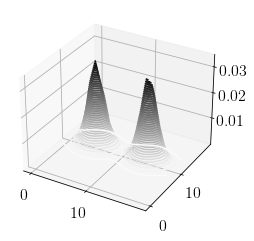

In [31]:
measure="gf/"
prof=folder+measure+"profile4dt0.4c100to.dat"

density,sizes=Read.topology(prof)
print(sizes)

density_2d=density.sum(axis=(0,1))

fig = plt.figure()
ax = plt.axes(projection='3d')
X=np.arange(0,sizes[2])
Y=np.arange(0,sizes[3])
ax.contour3D(X,Y,density_2d, 50, cmap='binary')

[4, 20, 20, 20]
[[ 0  3]
 [ 9 10]
 [10 10]
 [14  5]]


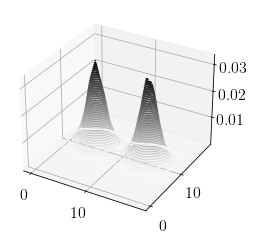

In [41]:
measure="afm/parity_1/"
prof=folder+measure+"SusyMode"

density,sizes=Read.ascii_mode(prof)
print(sizes)

density_2d=density.sum(axis=(0,1))
maxima=Maxima.simple(density,sizes)
print(maxima)

density.astype('float32').tofile("../caloron.dat")

fig = plt.figure()
ax = plt.axes(projection='3d')
X=np.arange(0,sizes[2])
Y=np.arange(0,sizes[3])
ax.contour3D(X,Y,density_2d, 50, cmap='binary')

In [42]:
4*20*20*20

32000